In [10]:
import json
import pandas as pd
import requests
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx

In [3]:
follows = pd.read_csv('/Users/juliabijak/github/shared-folder-gald/data/follow-link.csv')

In [5]:
follows

,Unnamed: 0,source,target
0,0,designs_from_time,cosmicsummit
1,1,cosmicsummit,conspiracyhubog
2,2,conspiracyhubog,cosmicsummit
3,3,guildworld,venetialamanna
4,4,guildworld,i_d
...,...,...,...
161886,161886,javert315,ksgarner
161887,161887,javert315,bethfrombklyn
161888,161888,ynotsissy,melmelbourne_
161889,161889,basicbxtchthrift,brooklynkarasack


In [6]:
videos = pd.read_json('/Users/juliabijak/github/shared-folder-gald/data/video-creators.json')

In [4]:
usernames_unique = pd.unique(follows[['source', 'target']].values.ravel()).tolist()
usernames_unique

['designs_from_time',
 'cosmicsummit',
 'conspiracyhubog',
 'guildworld',
 'venetialamanna',
 'i_d',
 'texasbeeworks',
 'dcopperman',
 'healthyholistichomes',
 'maxlamanna',
 'thatcurlytopp',
 'zainab.slow.fashion',
 'politicsjoe',
 'tedtoks',
 'bbcnews',
 'lois1xblue',
 'vicenews',
 'andreacheong_',
 'nssmagazine',
 'iobservefashion',
 'nowthisearth',
 'billnye',
 'worldeconomicforum',
 'gardenmarcus',
 'pelacase',
 'okczoo',
 'alexisnikole',
 'greenpeace_international',
 'onetreeplanted',
 'wwf',
 'newscientist',
 'kirasabin',
 'havrestudio',
 'earthrise.studio',
 'cristinamantas',
 'farmer_nick',
 'flourishingmother',
 'joycelynlongdon',
 'iamtabithabrown',
 'herbifoods',
 'minimalistbaker',
 'browngirlgreen',
 'pxgon',
 'sustainthemag',
 'aditimayer',
 'nataliatrevinoamaro',
 'swansonsfabrics',
 'stopbigoil',
 'ethiqueworld',
 'xiyebastida',
 'siranda_manchez',
 'domipalmer',
 'maggie_zhou',
 'ouryouth4theclimate',
 'ecofran',
 'thehellajam',
 'judybaogarden',
 'goingzerowaste_',
 

In [7]:
all_hashtags = videos['hashtag_names'].explode().to_list()
import random

usernames = [f"user_{i}" for i in range(1, 401)]
data = {"username": usernames, "hashtags": [random.sample(all_hashtags, 5) for _ in range(400)]}

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
df.head()

,username,hashtags
0,user_1,"[doctorsinging, must, life, sandwich, stylist]"
1,user_2,"[fishtanks, bonn, government, shoestransition,..."
2,user_3,"[thebeautyofnatura, nursingstudent, cincher, f..."
3,user_4,"[sourdough, american, celebs, foryoupage, imad..."
4,user_5,"[oceanillustration, robbery, nan, easyrecipes,..."


In [8]:


# Generate 600 random follower-followee relationships, ensuring each user appears as a follower at least once
followers = []
followees = []

# Ensure all users are followers and followees
# Randomly shuffle users to ensure diversity
all_users = usernames.copy()

# First, assign some random following relationships to the users (600 pairs)
for _ in range(600):
    follower = random.choice(usernames)
    followee = random.choice(usernames)

    # Prevent a user from following themselves (optional, if desired)
    while follower == followee:
        followee = random.choice(usernames)

    followers.append(follower)
    followees.append(followee)

# Create DataFrame
followers_df = pd.DataFrame({"follower": followers, "followee": followees})

# Display first few rows of the follower-followee relationship DataFrame
print(followers_df.head())

# Verify the number of relationships
print(f"Total number of relationships: {len(followers_df)}")

   follower  followee
0  user_263  user_191
1  user_192  user_283
2  user_288  user_221
3   user_98  user_131
4  user_182  user_337
Total number of relationships: 600


In [16]:
# Initialize a dictionary to store the directed network
edges = defaultdict(int)

# Create the directed network (user1 -> user2)
for _, row in followers_df.iterrows():
    user1 = row['follower']
    user2 = row['followee']
    
    # Retrieve the hashtags for each user
    hashtags_user1 = df[df['username'] == user1]['hashtags'].values[0]
    hashtags_user2 = df[df['username'] == user2]['hashtags'].values[0]
    
    # Create directed edges between user1's hashtags and user2's hashtags
    for h1 in hashtags_user1:
        for h2 in hashtags_user2:
            edges[(h1, h2)] += 1  # Increment weight for this hashtag pair

# Convert to NetworkX graph (directed graph with weights)
G = nx.DiGraph()
for (h1, h2), weight in edges.items():
    G.add_edge(h1, h2, weight=weight)

# Output some edges with weights for verification
print("Some edges in the directed network with weights:")
for edge in list(G.edges(data=True))[:10]:
    print(edge)  # Format: (hashtag1, hashtag2, {'weight': X})

# Verify the number of edges
print(f"Total number of edges: {len(G.edges())}")


Some edges in the directed network with weights:
('europetiktok', 'babydog', {'weight': 1})
('europetiktok', 'transrights', {'weight': 1})
('europetiktok', 'animallover', {'weight': 1})
('europetiktok', 'pregnancy', {'weight': 1})
('europetiktok', 'plasticfreepackaging', {'weight': 1})
('europetiktok', 'depression', {'weight': 1})
('europetiktok', 'livingsimply', {'weight': 1})
('europetiktok', 'bushman', {'weight': 1})
('europetiktok', 'regenerativeagriculture', {'weight': 1})
('europetiktok', 'relationship', {'weight': 1})
Total number of edges: 14890


In [19]:
pip install networkx matplotlib pygraphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [100 lines of output]
      /private/var/folders/c1/phfhvpvx33z0wfs1rywcsz140000gn/T/pip-build-env-nfl4kr7c/overlay/lib/python3.11/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove 

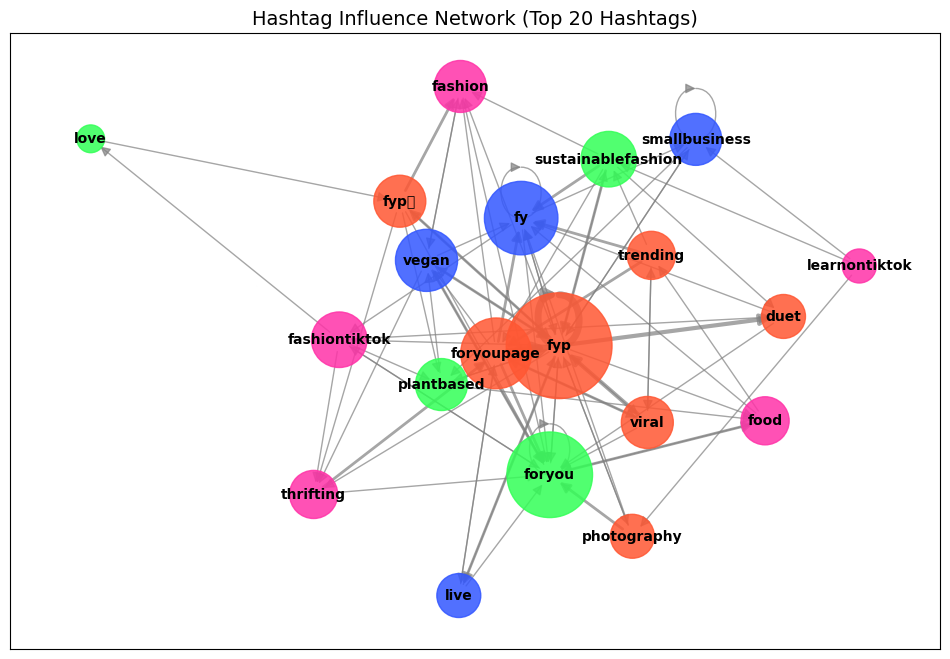

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Select top N most connected hashtags to visualize (to keep the graph readable)
N = 20  # Change this number to control how many nodes are displayed
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:N]
top_hashtags = {node for node, _ in top_nodes}

# Create a subgraph with only the top N hashtags
G_sub = G.subgraph(top_hashtags)

# Define node size based on degree
node_sizes = [G_sub.degree(n) * 200 for n in G_sub.nodes()]  # Scale size for visibility

# Define edge width based on weight (stronger connections = thicker edges)
edge_weights = [G_sub[u][v]['weight'] for u, v in G_sub.edges()]
max_weight = max(edge_weights) if edge_weights else 1
edge_widths = [(w / max_weight) * 5 for w in edge_weights]  # Normalize and scale

# Define node colors (randomized for better distinction)
node_colors = [random.choice(["#ff5733", "#33ff57", "#3357ff", "#ff33a8", "#ffcc33"]) for _ in G_sub.nodes()]

# Use spring layout (force-directed graph)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sub, seed=42, k=0.5)  # Adjust k for spread

# Draw nodes
nx.draw_networkx_nodes(G_sub, pos, node_size=node_sizes, node_color=node_colors, alpha=0.85)

# Draw edges
nx.draw_networkx_edges(G_sub, pos, width=edge_widths, edge_color='gray', alpha=0.7, arrows=True, arrowsize=15)

# Draw labels
nx.draw_networkx_labels(G_sub, pos, font_size=10, font_weight="bold", font_color="black")

# Title
plt.title("Hashtag Influence Network (Top 20 Hashtags)", fontsize=14)

# Show plot
plt.show()
